In [1]:
from ibis import _
import ibis
import seaborn.objects as so
import vega_datasets

ibis.options.interactive = True

In [2]:
cars = ibis.memtable(vega_datasets.data.cars())
cars = cars.relabel({col: col.casefold() for col in cars.columns})
cars.head()

,name,miles_per_gallon,cylinders,displacement,horsepower,weight_in_lbs,acceleration,year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


In [3]:
cars.aggregate([
    cars["year"].nunique().name("n_years"),
    cars["origin"].nunique().name("n_origin")
])

,n_years,n_origin
0,12,3


In [4]:
cars.aggregate(
    n_years=cars["year"].nunique(),
    n_origin=cars["origin"].nunique()
)

,n_years,n_origin
0,12,3


In [5]:
cars.aggregate(**{
    "n_years": cars["year"].nunique(),
    "n_origin": cars["origin"].nunique()
})

,n_years,n_origin
0,12,3


In [6]:
cars.aggregate(
    n_years=_.year.nunique(),
    n_origin=_.origin.nunique()
)

,n_years,n_origin
0,12,3


In [7]:
cars.group_by("year").count().limit(5)

,year,count
0,1970-01-01,35
1,1971-01-01,29
2,1972-01-01,28
3,1973-01-01,40
4,1974-01-01,27


In [8]:
cars.aggregate(cars.count(), by="year").limit(5)

,year,count
0,1970-01-01,35
1,1971-01-01,29
2,1972-01-01,28
3,1973-01-01,40
4,1974-01-01,27


In [9]:
cars["year"].value_counts().limit(5)

,year,count
0,1970-01-01,35
1,1971-01-01,29
2,1972-01-01,28
3,1973-01-01,40
4,1974-01-01,27


In [10]:
median_displacement = cars["displacement"].approx_median().name("median_displacment")

In [11]:
cars.select(median_displacement).head()

,median_displacment
0,148.666667
1,148.666667
2,148.666667
3,148.666667
4,148.666667


In [12]:
cars.aggregate(median_displacement).head()

,median_displacment
0,148.666667


In [13]:
cars.filter(cars["cylinders"] == 8).aggregate(median_displacement).head()

,median_displacment
0,350.0


In [14]:
is_cylinders8 = (cars["cylinders"] == 8).name("is_cylinders8")

In [15]:
cars.select(is_cylinders8).head()

,is_cylinders8
0,True
1,True
2,True
3,True
4,True


In [16]:
cars.count(), cars.filter(is_cylinders8).count()

(406, 108)

In [17]:
cars.filter(lambda t: t["cylinders"] == 8).count()

108

In [18]:
cars.aggregate(median_displacement, by="cylinders")

,cylinders,median_displacment
0,8,350.000000
1,4,105.666667
2,6,228.000000
3,3,70.000000
4,5,131.000000


In [19]:
cars.group_by("cylinders").count()

,cylinders,count
0,8,108
1,4,207
2,6,84
3,3,4
4,5,3


In [20]:
cars.group_by("origin").aggregate(
    count=lambda t: t.count(),
    avg_displacement=lambda t: t.displacement.mean()
)

,origin,count,avg_displacement
0,USA,254,247.935039
1,Europe,73,109.465753
2,Japan,79,102.708861


In [21]:
cars.group_by("origin").aggregate(**{
    "count": lambda t: t.count(),
    "avg_displacement": lambda t: t["displacement"].mean()
})

,origin,count,avg_displacement
0,USA,254,247.935039
1,Europe,73,109.465753
2,Japan,79,102.708861


In [22]:
cars.group_by("origin").aggregate(**{
    "avg_displacement": lambda t: t["displacement"].sum() / t.count()
})

,origin,avg_displacement
0,USA,247.935039
1,Europe,109.465753
2,Japan,102.708861


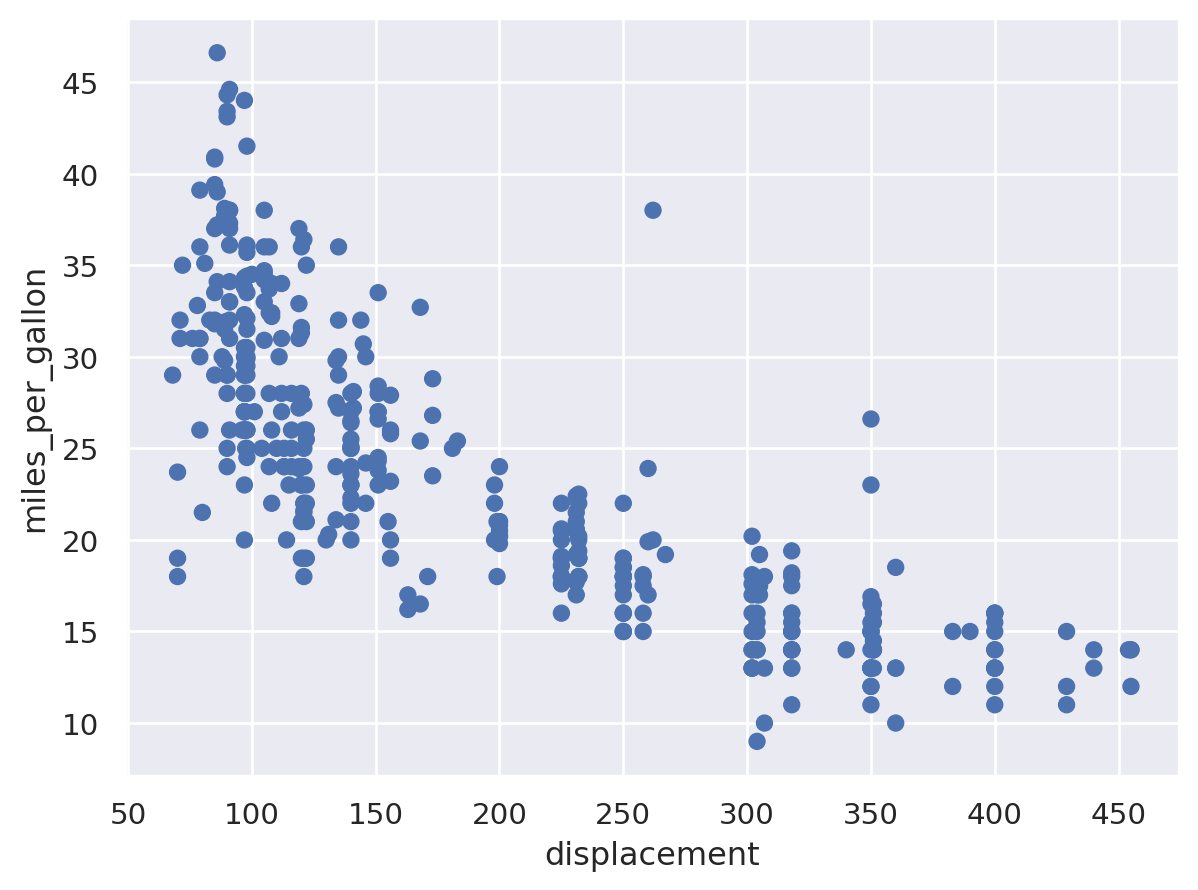

In [23]:
so.Plot(cars.execute(), x="displacement", y="miles_per_gallon").add(so.Dot())

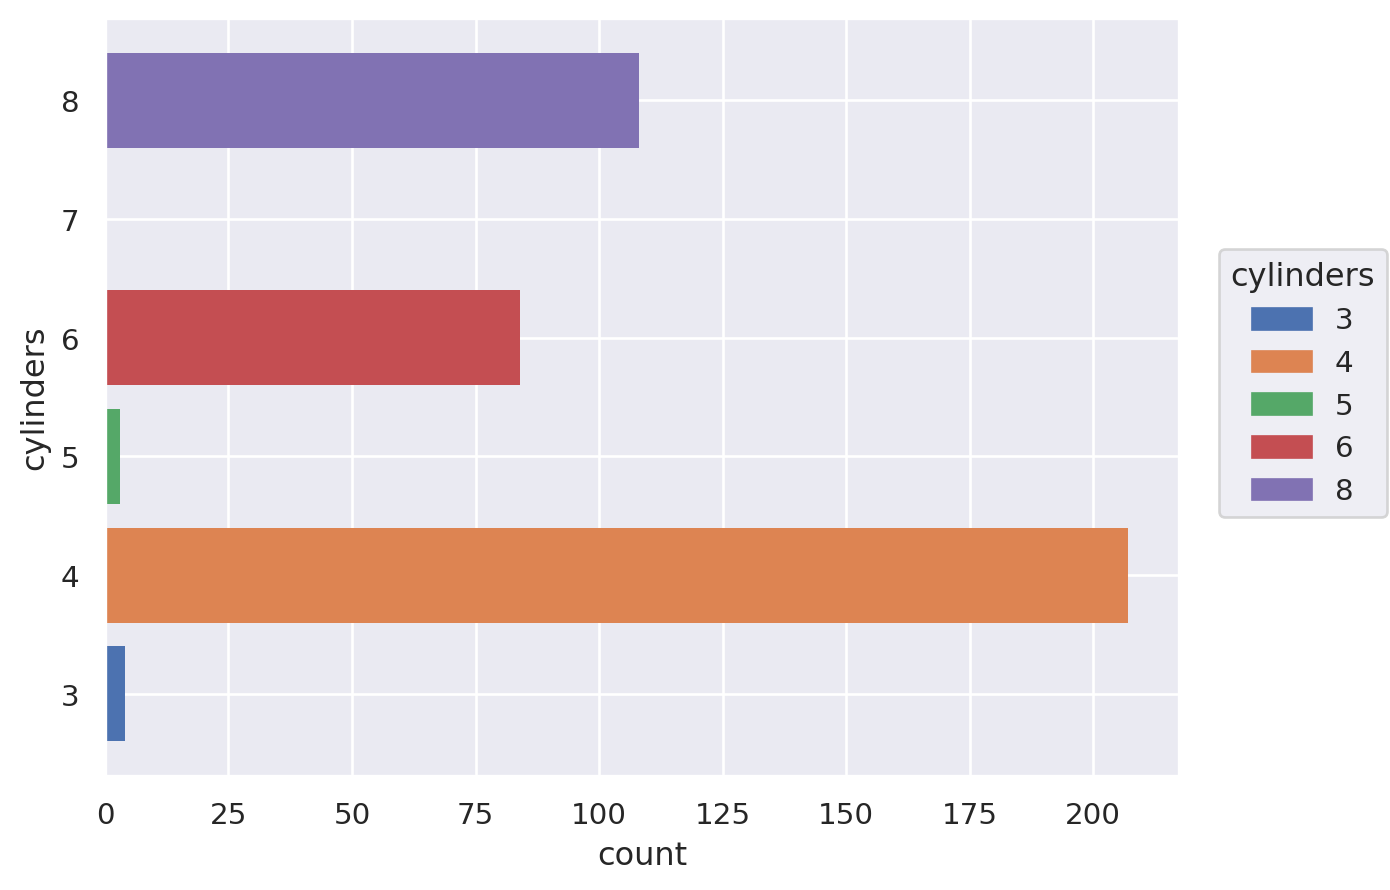

In [24]:
so.Plot(
    cars.group_by("cylinders").count().execute(),
    x="count",
    y="cylinders",
    color="cylinders"
).add(so.Bar(alpha=1), orient="y").scale(color=so.Nominal())

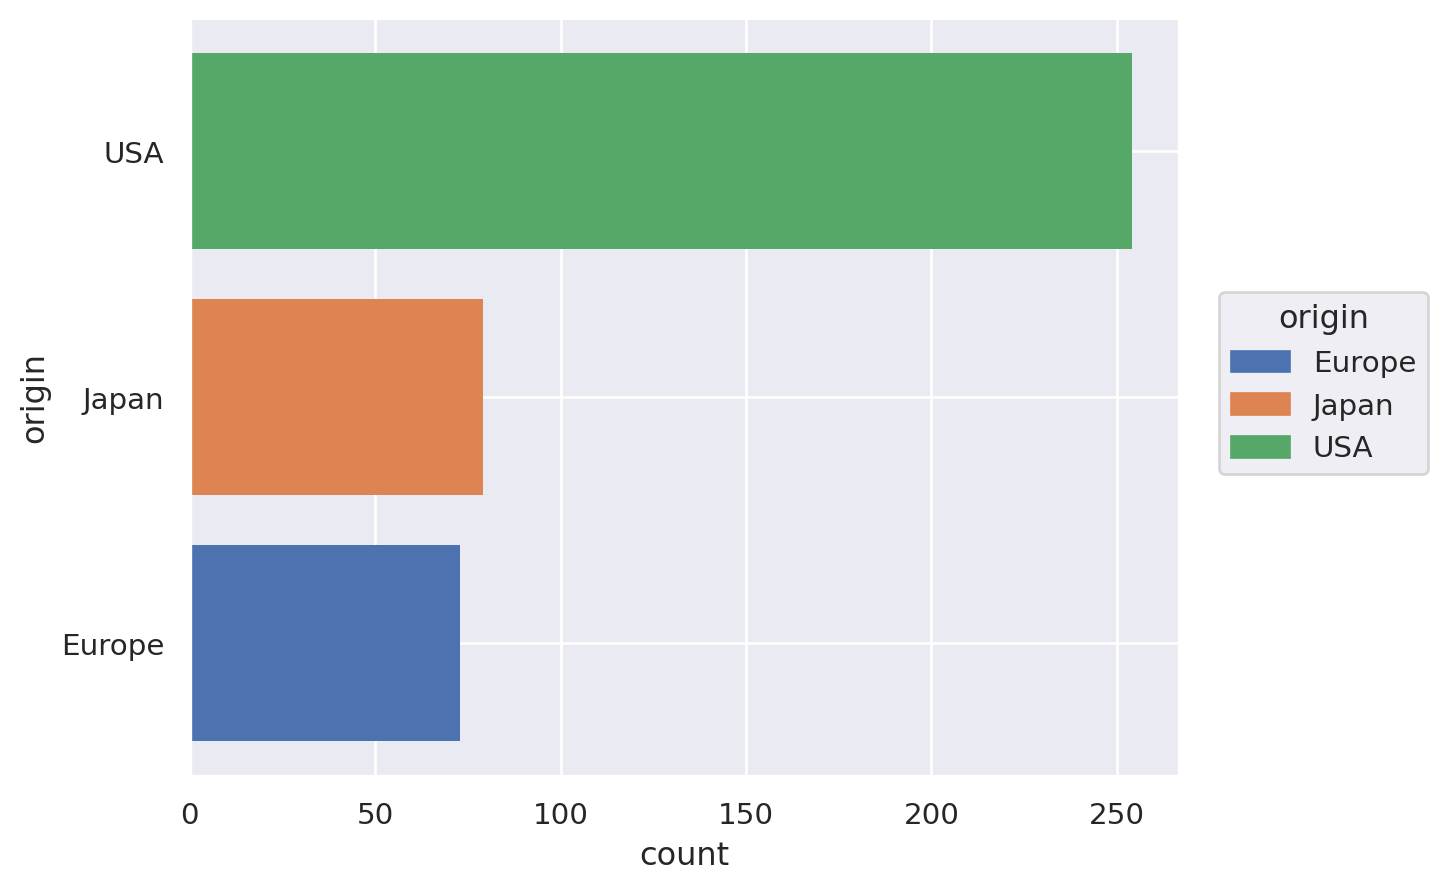

In [25]:
so.Plot(
    cars.group_by("origin").count().sort_by("count").execute(),
    x="count",
    y="origin",
    color="origin"
).add(so.Bar(alpha=1))

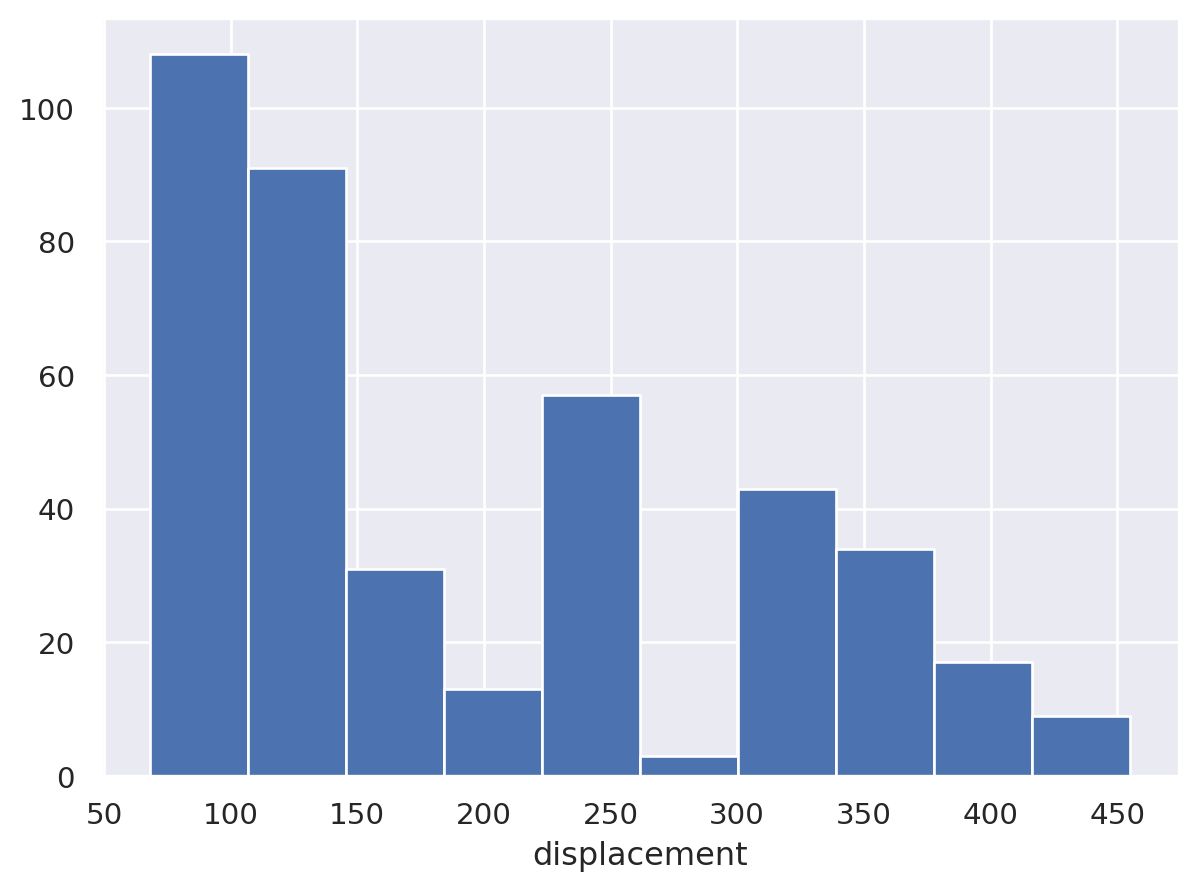

In [26]:
so.Plot(cars.execute(), x="displacement").add(so.Bars(alpha=1), so.Hist())

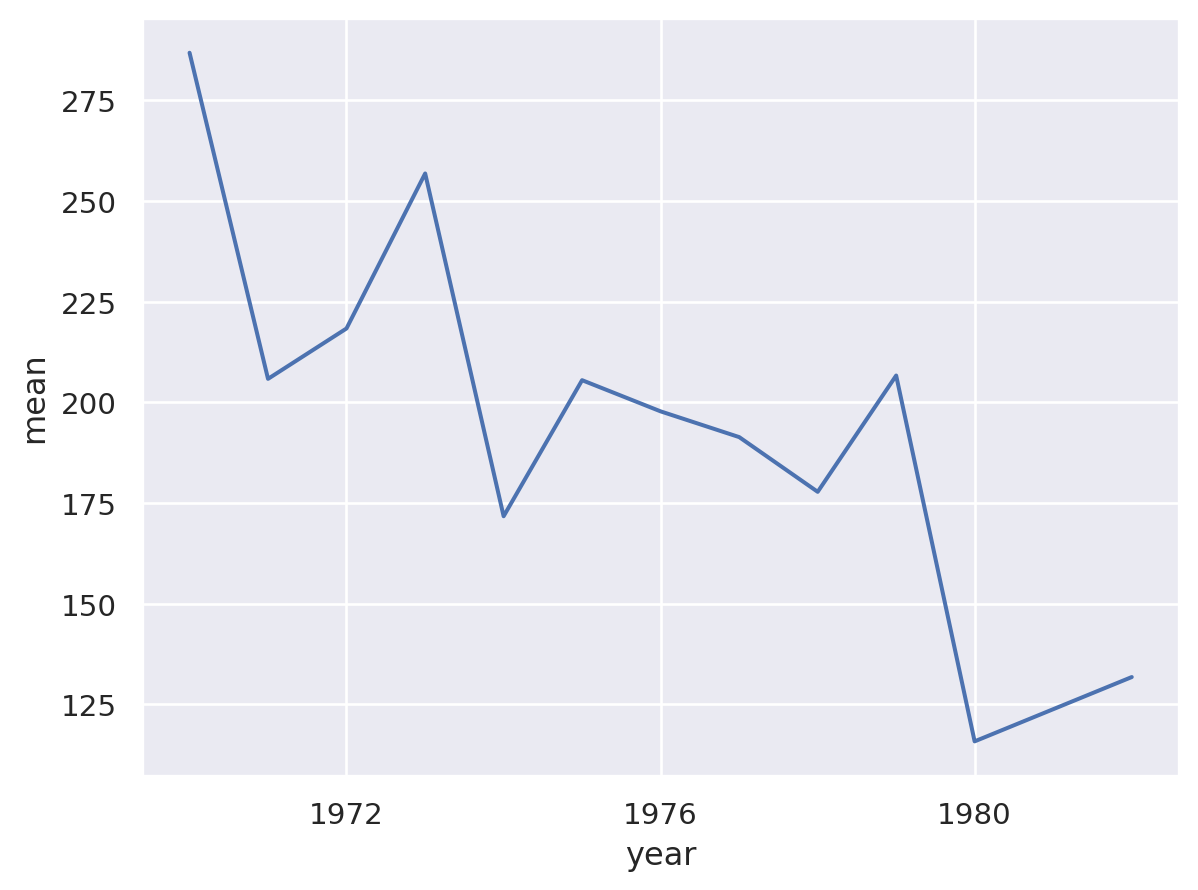

In [27]:
so.Plot(
    cars.group_by("year").aggregate(cars["displacement"].mean()).execute(),
    x="year",
    y="mean"
).add(so.Line())

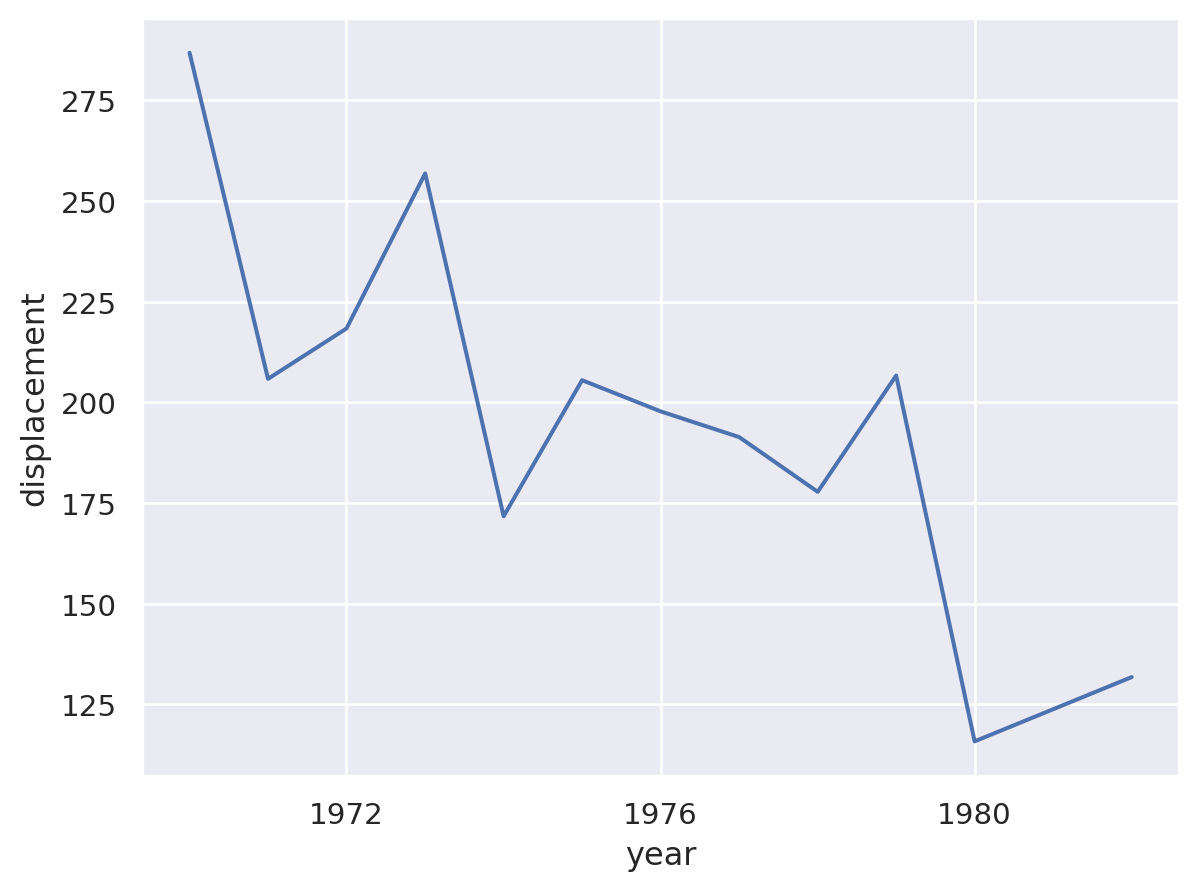

In [28]:
so.Plot(cars.execute(), x="year", y="displacement").add(so.Line(), so.Agg())

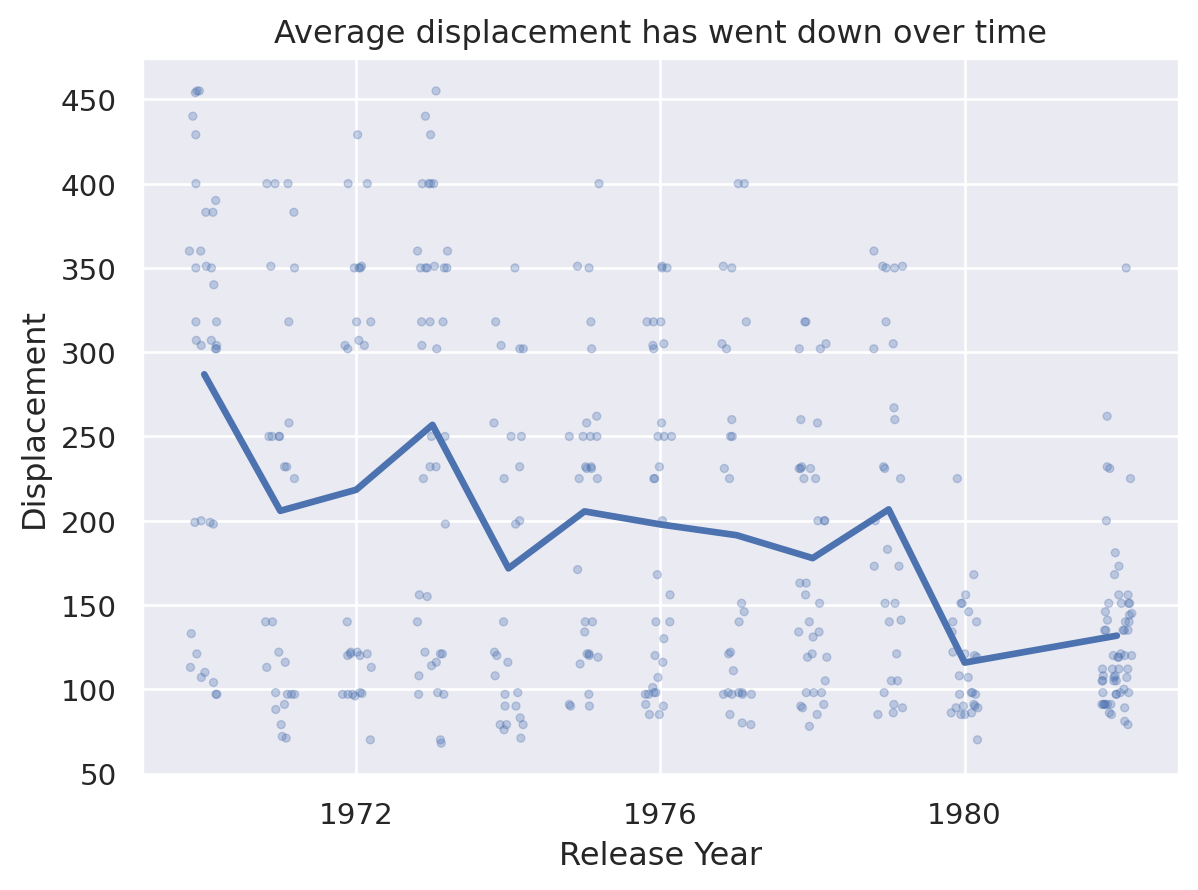

In [29]:
(
    so.Plot(
        cars.execute(),
        x="year",
        y="displacement")
    .add(so.Line(linewidth=2.5, alpha=1), so.Agg())
    .add(so.Dot(pointsize=3, alpha="0.3"), so.Jitter(0.5))
    .scale(x=so.Temporal())
    .label(
        title="Average displacement has went down over time",
        x="Release Year",
        y="Displacement"
    )
)